<h1 align="center">Facial Recognition (November 2017) </h1>

In [1]:
import numpy as np
from os import walk
from scipy.misc import imread
import scipy as sp
from scipy import linalg as la

from matplotlib import pyplot as plt, rcParams
%matplotlib inline

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, flatten=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, flatten=True))

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    image = np.reshape(image,(m,n))
    plt.imshow(image, cmap = 'gray')
    plt.axis("off")
    plt.show()
    

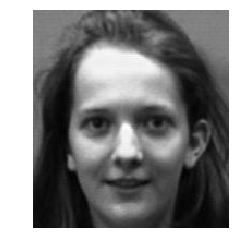

In [4]:
# Show a face from the faces94 dataset.
for i in sample_faces(1):
    show(i)


## Facial Recognition Class

In [25]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        project - project a face vector onto suspace
        find_nearest - find index of closest match for a face
    """
    def __init__(self, path='./faces94'):
        """Initialize all attributes.
        This is the main part of the computation.
        """
        F = get_faces(path)
        mu = np.mean(F, axis = 1)
        
        F_bar = F.T - mu
        U, Sig, V = la.svd(F_bar.T, full_matrices = False)
        print(U.shape, "test")
        self.U = U
        self.F_bar = F_bar.T
        self.F = F
        self.mu = mu
        

    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        U_s = self.U[:,:s]
        return U_s.T @ A

    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        g_bar = g - self.mu
        g_hat = self.project(g_bar, s)
        F_hat = self.project(self.F_bar, s)
        comp = []
        row, col = F_hat.shape
        for i in range(col):
            comp.append(la.norm(F_hat[:,i] - g_hat,ord = 2))
        return np.argmin(comp)
        

    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        ind = self.find_nearest(image,s)
        Match = self.F[:,ind]
        return Match, m,n

(36000, 153) test


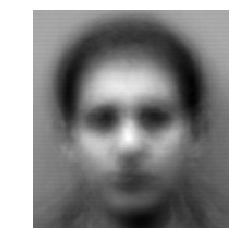

In [6]:
# Display the mean face.
A = FacialRec()
show(A.mu)



(36000, 153) test


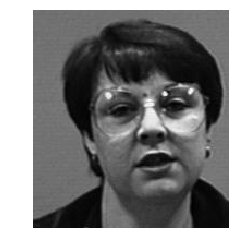

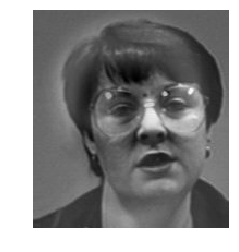

In [7]:
# Display an image along with its mean-shifted face.
C = FacialRec()

show(C.F[:,0])
show(C.F_bar[:,0])


(36000, 153) test


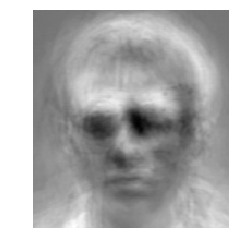

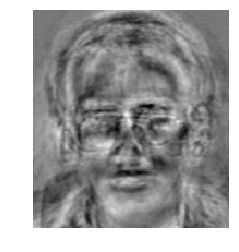

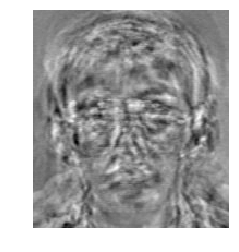

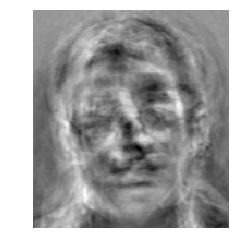

In [8]:
# Display some of the eigenfaces.
D = FacialRec()
for i in [4,50,93,22]:
    show(D.U[:,i])

(36000, 153) test


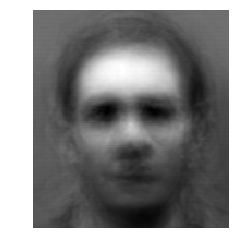

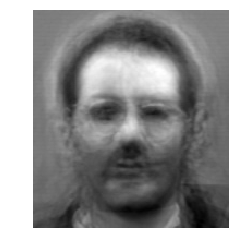

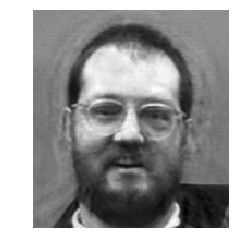

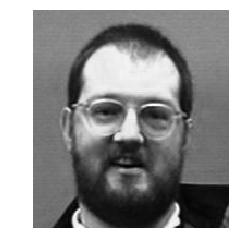

original image:


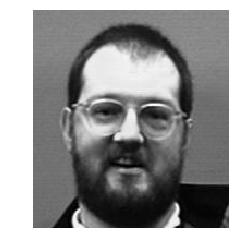

In [14]:
# Display a face image reconstructed with various numbers of eigenfaces. 
B = FacialRec()
f1 = B.F_bar[:,20]
for s in [5,20,80,130]:
    f1_hat = B.project(f1.T,s)
    f1_tilde = B.U[:,:s] @ f1_hat + B.mu
    #show(f1_hat)
    show(f1_tilde)
print("original image:")
show(B.F[:,20])

(36000, 153) test
sample face:


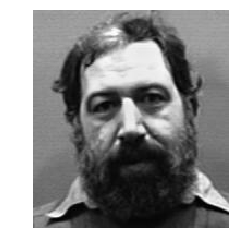

match for sample face:


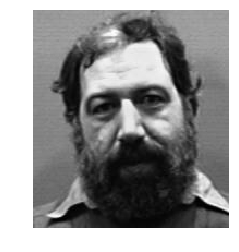


 

sample face:


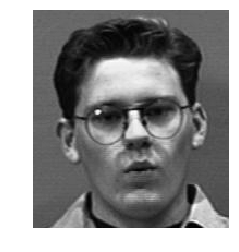

match for sample face:


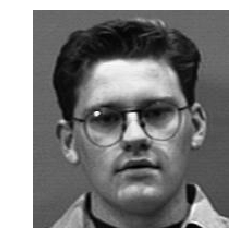


 

sample face:


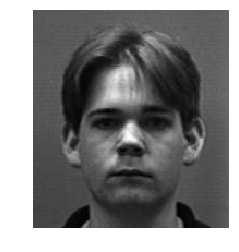

match for sample face:


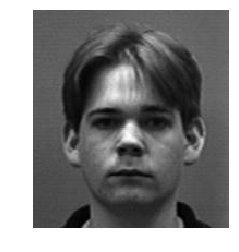


 

sample face:


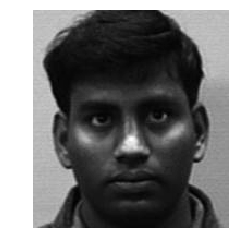

match for sample face:


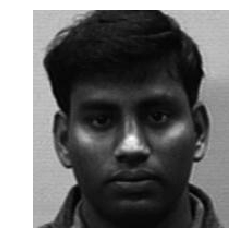


 

sample face:


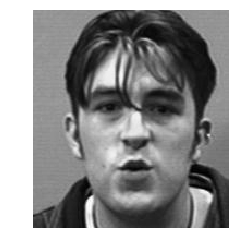

match for sample face:


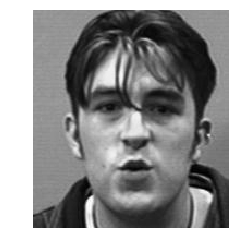

In [26]:
# Display some random images along with their closest match.
D = FacialRec()
for test_image in sample_faces(5):
    face_match, m, n = D.match(test_image,38)
    print("sample face:")
    show(test_image, m,n)
    print("match for sample face:")
    show(face_match)
    print("\n \n")
    